<a href="https://colab.research.google.com/github/jayantc14/News-Classification/blob/main/Copy_of_FakenewsRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IIM/data")

In [ ]:
df.drop(['Unnamed: 0'],axis = 1,inplace  = True)

In [ ]:
df

,Analytic,Authentic,Tone,WPS,Sixltr,number,quant,posemo,negemo,tentat,certain,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,FREScore,target
0,97.02,22.27,35.07,23.41,28.44,2.80,1.34,1.60,1.07,1.20,0.27,1.20,5.87,0.80,0.93,4.01,6.81,2.00,42.04,1
1,96.86,13.98,49.52,20.23,32.85,2.39,1.28,2.71,1.44,0.96,0.48,0.96,8.61,0.80,1.12,3.83,5.10,2.07,32.57,1
2,94.73,16.26,29.43,24.05,27.35,0.88,1.75,1.09,0.88,3.94,0.66,0.66,6.13,0.44,0.00,5.47,5.47,1.97,39.91,1
3,96.40,12.12,55.62,22.29,32.19,2.11,0.53,2.11,0.53,1.32,0.26,1.32,6.60,0.53,0.00,6.33,3.43,0.53,45.49,1
4,96.29,22.73,15.88,22.05,27.21,4.19,3.14,1.16,1.86,0.93,0.81,0.81,3.60,0.70,0.93,3.49,5.47,0.23,50.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44873,96.34,16.74,46.26,49.00,28.01,1.11,2.04,3.90,2.78,2.60,0.93,0.74,3.15,0.93,0.37,5.19,3.71,0.37,22.35,0
44874,94.03,14.89,56.75,27.73,19.02,3.28,1.97,2.95,1.31,1.97,0.33,2.30,5.57,2.30,0.33,3.93,6.23,0.98,51.41,0
44875,90.88,33.24,22.15,38.88,22.66,1.59,1.99,2.48,2.71,2.22,1.54,1.68,4.68,0.77,1.03,2.83,5.94,1.52,28.24,0
44876,91.99,25.14,49.16,47.70,20.34,4.40,2.31,2.52,1.26,1.05,2.10,2.10,3.14,1.68,1.05,3.77,7.13,0.84,27.16,0


In [ ]:
y = df['target']

In [ ]:
X = df.drop(['target'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
X = X.apply(normalize) 

In [ ]:
# scaling the features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# scaling the features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31414, 19)
(31414,)
(13464, 19)
(13464,)


In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
model = RandomForestClassifier()

In [ ]:
# fit model on training data with default hyperparameters

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[6667  390]
 [ 466 5941]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7057
           1       0.94      0.93      0.93      6407

    accuracy                           0.94     13464
   macro avg       0.94      0.94      0.94     13464
weighted avg       0.94      0.94      0.94     13464



In [ ]:
print(model.score(X_test,y_test))

0.936423054070113


In [ ]:
from matplotlib import pyplot

Feature: 0, Score: 0.17520
Feature: 1, Score: 0.03187
Feature: 2, Score: 0.01942
Feature: 3, Score: 0.15147
Feature: 4, Score: 0.11250
Feature: 5, Score: 0.02745
Feature: 6, Score: 0.02002
Feature: 7, Score: 0.01815
Feature: 8, Score: 0.02629
Feature: 9, Score: 0.01904
Feature: 10, Score: 0.06627
Feature: 11, Score: 0.02665
Feature: 12, Score: 0.05447
Feature: 13, Score: 0.01785
Feature: 14, Score: 0.01738
Feature: 15, Score: 0.07396
Feature: 16, Score: 0.05309
Feature: 17, Score: 0.02906
Feature: 18, Score: 0.05987


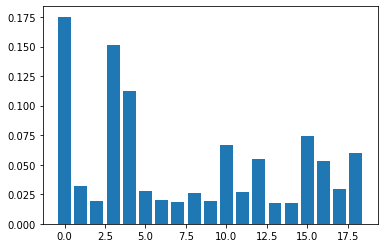

In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#results from tuning which is done below

model = RandomForestClassifier(learningrate= 0.1,
           max_depth =10,
          subsample=1,
          n_estimators=150)

TypeError: ignored

In [ ]:

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

## **Hyperparameter Tuning**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 10

# specify range of hyperparameters
#param_grid = {'learning_rate': [0.1,0.5], 
             #'subsample': [ 0.6, 1]}          


# specify model
rf = RandomForestClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rf, 
                        param_grid = param_grid,                          
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

In [ ]:
# fit the model
model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

NameError: ignored

In [ ]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'subsample': 1}

In [ ]:
# chosen hyperparameters

params = {'learning_rate': 0.1,
           'max_depth': 10,
          'subsample':1,
          'n_estimators': 150
         }

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 10,
                      'n_estimators': 150, 'subsample': 1},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[6327  730]
 [ 569 5838]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7057
           1       0.89      0.91      0.90      6407

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464



In [ ]:
print(model.score(X_test,y_test))

0.9035204991087344
